___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import os

# Set TF log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

np.set_printoptions(suppress=True)

In [3]:
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [4]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
print(f"There are {len(X_train)} images in the training dataset")
print(f"There are {len(X_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [6]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [7]:
# Checking the shape of one image
X_train[9].shape

(28, 28)

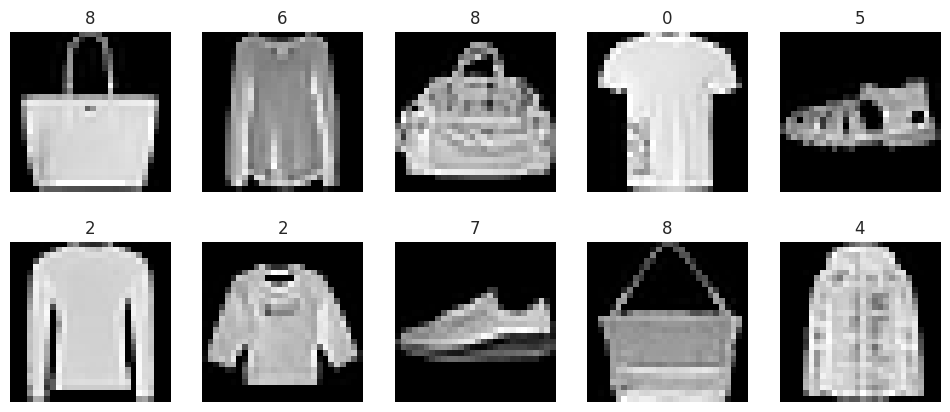

In [8]:
f, axes = plt.subplots(2, 5, figsize=(12, 5))

for ax in axes.ravel():
    idx = np.random.randint(0, len(X_train))
    ax.axis("off")
    ax.set_title(y_train[idx])
    ax.imshow(X_train[idx], cmap="gray")
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [9]:
X_train[9].min()

0

In [10]:
X_train[9].max()

255

In [11]:
# Normalize image pixels
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [12]:
X_train[9].min()

0.0

In [13]:
X_train[9].max()

1.0

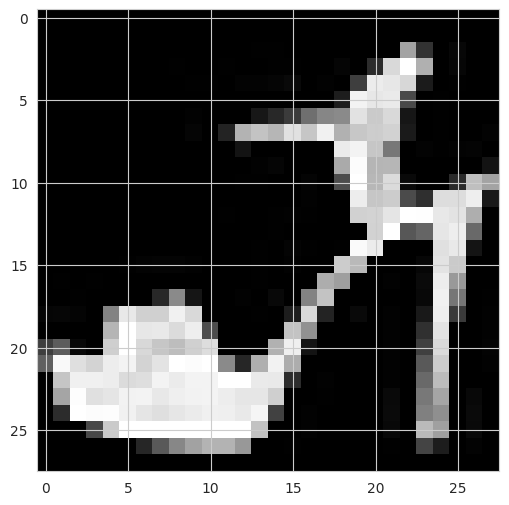

In [14]:
plt.imshow(X_train[9], cmap="gray")
plt.show()

In [15]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [16]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [17]:
y_train.shape

(60000,)

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [18]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [19]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [20]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [21]:
from keras.utils import to_categorical

Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

In [22]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [24]:
y_train[10]

0

In [25]:
Y_train[10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, MaxPooling2D

In [29]:
# Initialize the Sequential model
model = Sequential()

# Add a 2D convolutional layer
model.add(Conv2D(filters=28, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add a pooling layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

# Add a flatten layer
model.add(Flatten())

# Add a dense layer
model.add(Dense(128, activation='relu'))

# Add the final dense layer with softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

# To see a summary of the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
____________________________________________

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor="val_accuracy", mode="max", patience=4, restore_best_weights=True)

In [41]:
model.fit(
    X_train,
    Y_train,
    batch_size=4,
    epochs=20,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/20
15000/15000 [==============================] - 62s 4ms/step - loss: 0.2790 - accuracy: 0.9075 - val_loss: 0.3962 - val_accuracy: 0.8818
Epoch 2/20
15000/15000 [==============================] - 67s 4ms/step - loss: 0.3067 - accuracy: 0.9015 - val_loss: 0.4781 - val_accuracy: 0.8600
Epoch 3/20
15000/15000 [==============================] - 66s 4ms/step - loss: 0.3162 - accuracy: 0.8993 - val_loss: 0.4419 - val_accuracy: 0.8693
Epoch 4/20
15000/15000 [==============================] - 61s 4ms/step - loss: 0.3296 - accuracy: 0.8939 - val_loss: 0.4266 - val_accuracy: 0.8773
Epoch 5/20
15000/15000 [==============================] - 61s 4ms/step - loss: 0.3412 - accuracy: 0.8922 - val_loss: 0.4023 - val_accuracy: 0.8687


In [42]:
X_train.shape

(60000, 28, 28, 1)

In [43]:
Y_train.shape

(60000, 10)

In [44]:
model.metrics_names

['loss', 'accuracy']

In [45]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.279,0.907,0.396,0.882
1,0.307,0.902,0.478,0.860
2,0.316,0.899,0.442,0.869
3,0.330,0.894,0.427,0.877
4,0.341,0.892,0.402,0.869


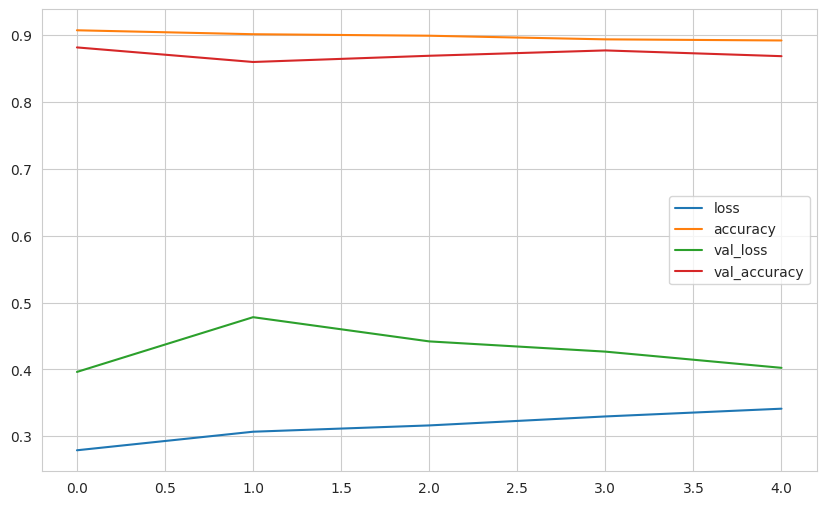

In [46]:
summary.plot();

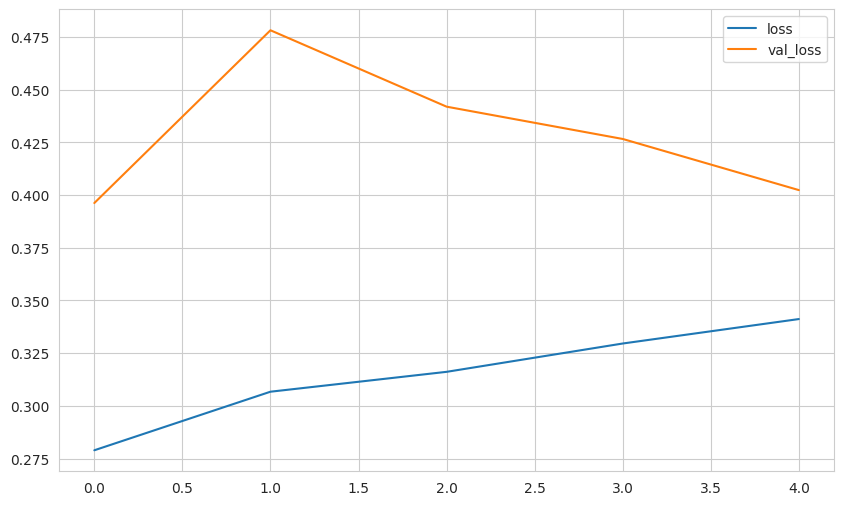

In [47]:
summary[["loss", "val_loss"]].plot();

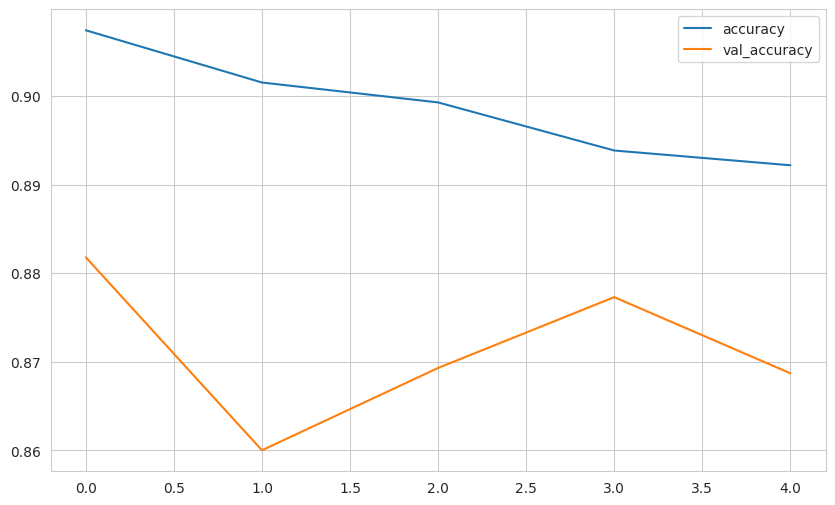

In [48]:
summary[["accuracy", "val_accuracy"]].plot();

Try with different batch_size to prevent overfitting

In [49]:
model.fit(
    X_train,
    Y_train,
    batch_size=12,
    epochs=20,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/20
5000/5000 [==============================] - 23s 5ms/step - loss: 0.2296 - accuracy: 0.9206 - val_loss: 0.3110 - val_accuracy: 0.8974
Epoch 2/20
5000/5000 [==============================] - 21s 4ms/step - loss: 0.2076 - accuracy: 0.9291 - val_loss: 0.3519 - val_accuracy: 0.9003
Epoch 3/20
5000/5000 [==============================] - 23s 5ms/step - loss: 0.1925 - accuracy: 0.9347 - val_loss: 0.3593 - val_accuracy: 0.8981
Epoch 4/20
5000/5000 [==============================] - 21s 4ms/step - loss: 0.1820 - accuracy: 0.9396 - val_loss: 0.4014 - val_accuracy: 0.8830
Epoch 5/20
5000/5000 [==============================] - 25s 5ms/step - loss: 0.1758 - accuracy: 0.9409 - val_loss: 0.4731 - val_accuracy: 0.8915
Epoch 6/20
5000/5000 [==============================] - 22s 4ms/step - loss: 0.1692 - accuracy: 0.9437 - val_loss: 0.3802 - val_accuracy: 0.8972


In [50]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.230,0.921,0.311,0.897
1,0.208,0.929,0.352,0.900
2,0.192,0.935,0.359,0.898
3,0.182,0.940,0.401,0.883
4,0.176,0.941,0.473,0.891


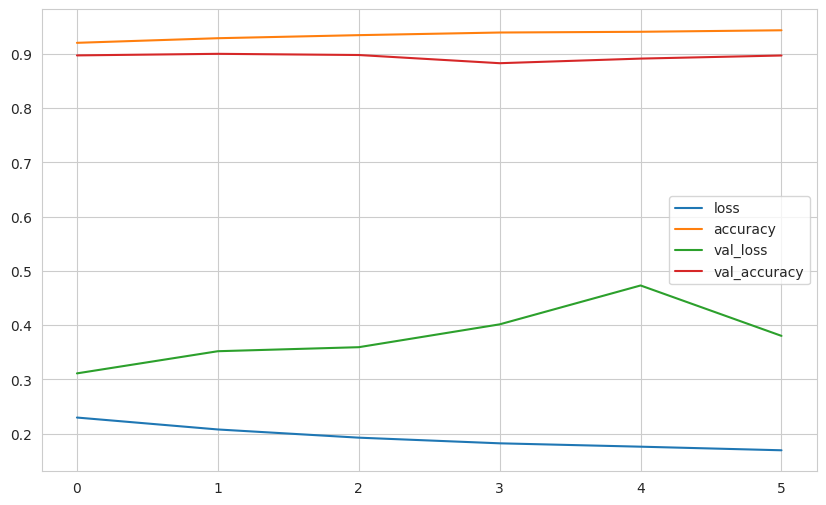

In [51]:
summary.plot();

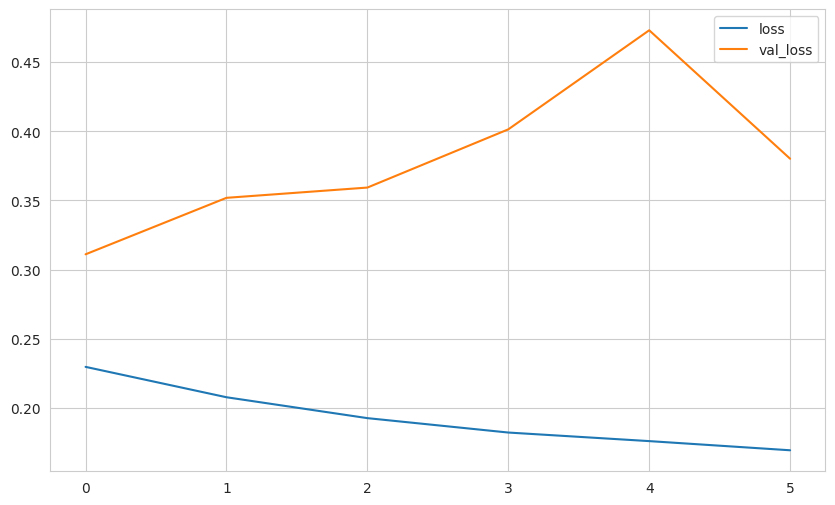

In [52]:
summary[["loss", "val_loss"]].plot();

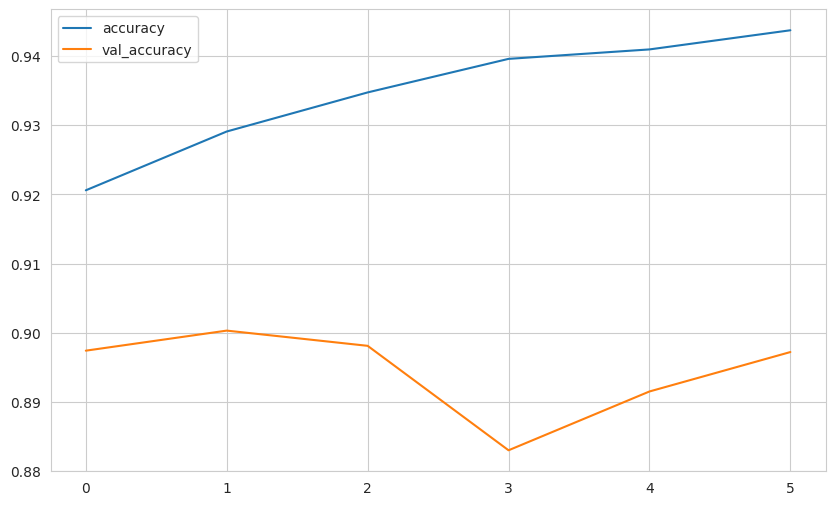

In [53]:
summary[["accuracy", "val_accuracy"]].plot();

In [57]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1019 - accuracy: 0.9657 - val_loss: 0.3710 - val_accuracy: 0.9056
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0910 - accuracy: 0.9686 - val_loss: 0.4027 - val_accuracy: 0.9068
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0811 - accuracy: 0.9725 - val_loss: 0.4147 - val_accuracy: 0.9039
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0738 - accuracy: 0.9746 - val_loss: 0.4583 - val_accuracy: 0.9129
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0663 - accuracy: 0.9777 - val_loss: 0.4555 - val_accuracy: 0.9110
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0599 - accuracy: 0.9793 - val_loss: 0.5465 - val_accuracy: 0.9077
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0526 - accuracy: 0.9821 - val_loss: 0.4954 - val_accuracy:

In [58]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.102,0.966,0.371,0.906
1,0.091,0.969,0.403,0.907
2,0.081,0.973,0.415,0.904
3,0.074,0.975,0.458,0.913
4,0.066,0.978,0.455,0.911


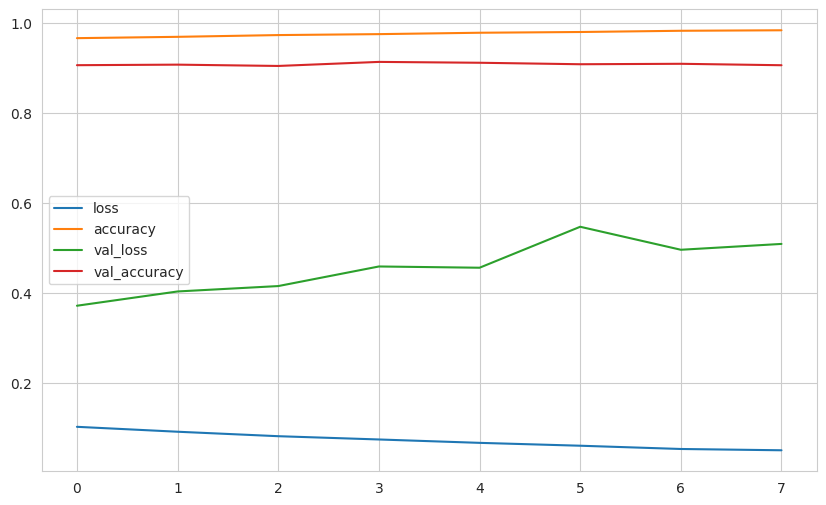

In [59]:
summary.plot();

In [60]:
model.fit(
    X_train,
    Y_train,
    batch_size=64,
    epochs=20,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0512 - accuracy: 0.9831 - val_loss: 0.4891 - val_accuracy: 0.9071
Epoch 2/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0438 - accuracy: 0.9851 - val_loss: 0.4792 - val_accuracy: 0.9123
Epoch 3/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0380 - accuracy: 0.9871 - val_loss: 0.4877 - val_accuracy: 0.9109
Epoch 4/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0334 - accuracy: 0.9887 - val_loss: 0.5156 - val_accuracy: 0.9080
Epoch 5/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0280 - accuracy: 0.9905 - val_loss: 0.5848 - val_accuracy: 0.9057
Epoch 6/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0258 - accuracy: 0.9916 - val_loss: 0.5477 - val_accuracy: 0.9076


**TASK 7: Plot values of metrics you used in your model.**

In [61]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.051,0.983,0.489,0.907
1,0.044,0.985,0.479,0.912
2,0.038,0.987,0.488,0.911
3,0.033,0.989,0.516,0.908
4,0.028,0.991,0.585,0.906


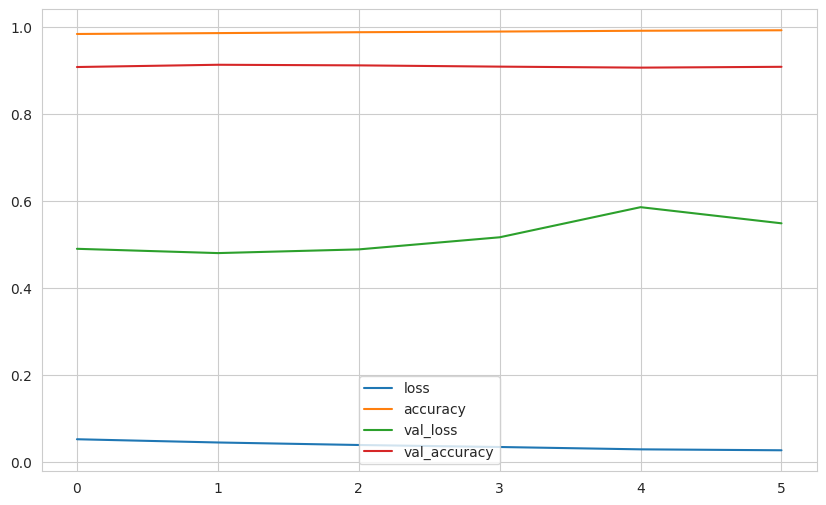

In [62]:
summary.plot();

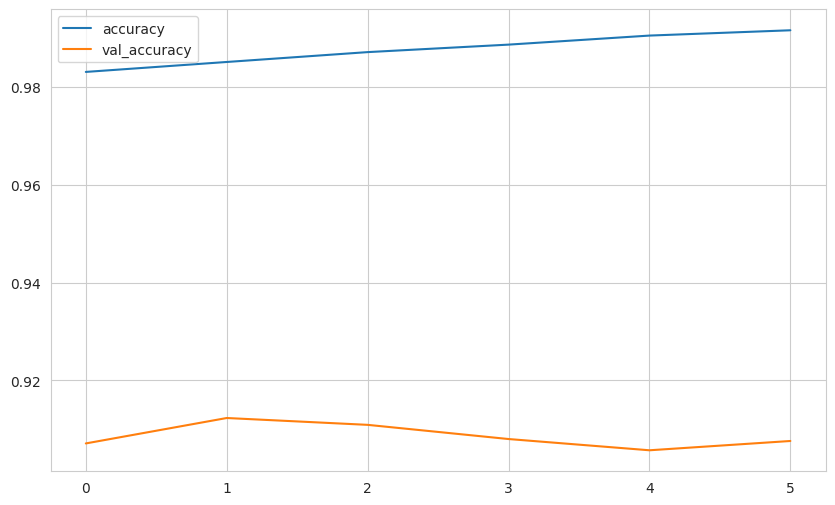

In [64]:
summary[["accuracy", "val_accuracy"]].plot();

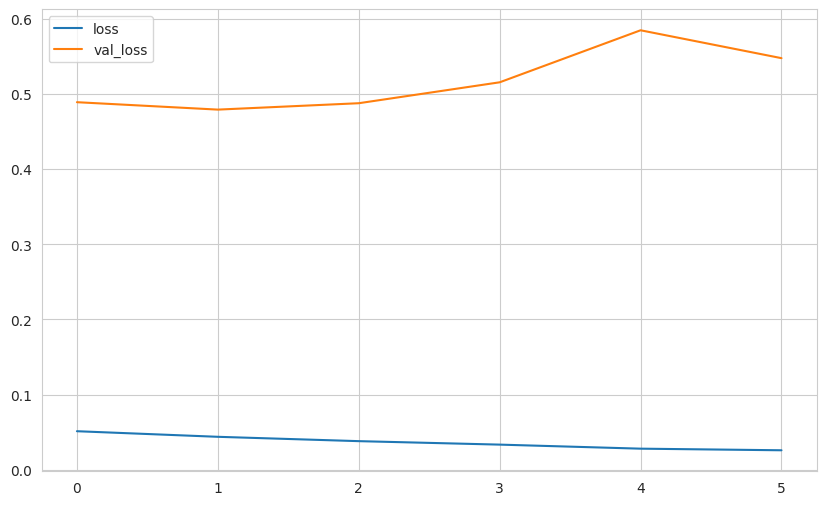

In [65]:
summary[["loss", "val_loss"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [66]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    multilabel_confusion_matrix,
)

In [67]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4792 - accuracy: 0.9123


[0.47924497723579407, 0.9122999906539917]

In [68]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.47924497723579407
Test accuracy: 0.9122999906539917


In [69]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00000008, 0.        , 0.00000179, ..., 0.04067537, 0.00000269,
        0.00001241]], dtype=float32)

In [70]:
pred_prob.shape

(10000, 10)

In [71]:
pred_prob[10]

array([0.        , 0.        , 0.00000014, 0.        , 0.9999988 ,
       0.        , 0.00000105, 0.        , 0.        , 0.        ],
      dtype=float32)

In [72]:
np.argmax(pred_prob[10])

4

In [73]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [74]:
y_pred.shape

(10000,)

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.89      0.82      0.85      1000
           3       0.91      0.92      0.91      1000
           4       0.79      0.92      0.85      1000
           5       0.99      0.97      0.98      1000
           6       0.80      0.74      0.77      1000
           7       0.95      0.98      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [76]:
print(confusion_matrix(y_test, y_pred))

[[859   1  19  16  11   1  85   1   7   0]
 [  2 977   2  13   3   0   2   0   1   0]
 [ 19   0 819   9 110   1  40   0   2   0]
 [ 15   5   9 915  30   1  25   0   0   0]
 [  0   0  32  16 919   1  31   0   1   0]
 [  0   0   0   1   0 973   0  15   0  11]
 [ 96   1  42  29  82   0 736   0  14   0]
 [  0   0   0   0   0   4   0 976   0  20]
 [  3   0   0   4   2   2   4   3 980   2]
 [  0   0   0   0   0   4   0  27   0 969]]


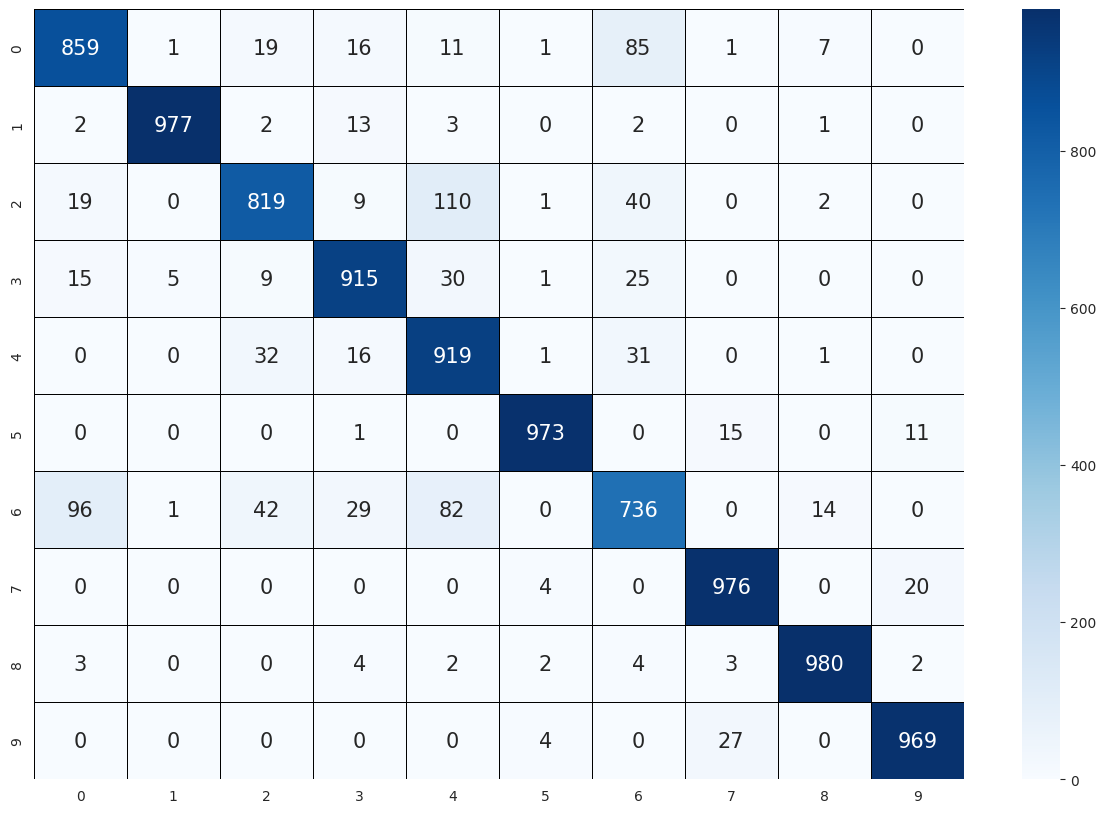

In [77]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

In [78]:
# y_test != y_pred
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [79]:
# (y_test != y_pred).sum()
np.not_equal(y_test, y_pred).sum()

877

In [80]:
np.equal(y_test, y_pred).sum()

9123

## Prediction

In [81]:
my_pred = X_test[3]

In [82]:
my_pred.shape

(28, 28, 1)

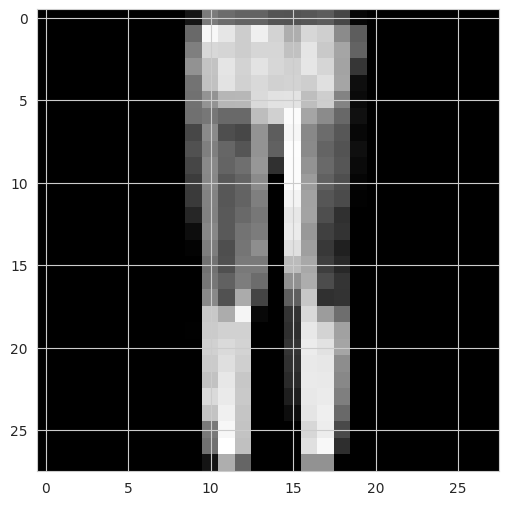

In [83]:
plt.imshow(my_pred, cmap="gray")
plt.show()

In [85]:
np.expand_dims(my_pred, 0).shape

(1, 28, 28, 1)

In [86]:
pred_prob = model.predict(np.expand_dims(my_pred, 0))
pred_prob

1/1 [==============================] - 0s 116ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [87]:
# SHAPE --> (num_images, width, height, color_channels)
y_pred = np.argmax(pred_prob)
y_pred

1

In [89]:
pred = model.predict(np.expand_dims(X_test[24], 0))

1/1 [==============================] - 0s 20ms/step


In [90]:
np.argmax(pred)

1

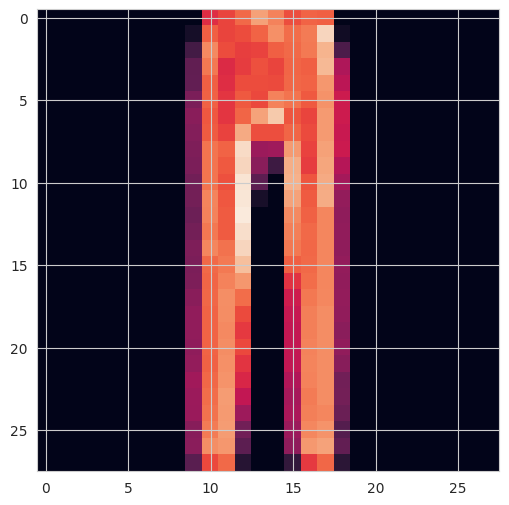

In [91]:
plt.imshow(X_test[24].reshape(28, 28))
plt.show()

In [92]:
model.save("image_classification.h5")

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___